In [1]:
import tensorflow.keras as K
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input
import numpy as np

In [2]:
#Carregar o modelo ResNet-50 pré-treinado:



#res_netModel = K.applications.ResNet50(include_top=False)

In [3]:
res_netModel = ResNet50(include_top=False)

In [4]:
res_netModel.summary()

Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, None,      │          0 │ -                 │
│ (InputLayer)        │ None, 3)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, None,      │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │ None, 3)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, None,      │      9,472 │ conv1_pad[0][0]   │
│                     │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, None,      │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, None,      │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, None,      │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, None,      │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, None,      │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, None,      │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, None,      │          0 │ conv2_block1_1_b… │
│ (Activation)        │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, None,      │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, None,      │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, None,      │          0 │ conv2_block1_2_b… │
│ (Activation)        │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, None,      │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ None, 256)        │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, None,      │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ None, 256)        │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, None,      │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ None, 256)        │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, None,      │      1,024 │ conv2_block1_3_c

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 23,534,592 (89.78 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [5]:

#Criar um novo modelo com a penúltima camada da ResNet-50:


#model = Model(inputs=res_netModel.input, outputs=res_netModel.get_layer('avg_pool').output)
model = K.models.Sequential()
model.add(res_netModel)
model.add(K.layers.Flatten())


In [6]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ ?                      │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 23,534,592 (89.78 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [7]:
#Para cada imagem, carregue-a, pré-processe-a e obtenha as características usando o modelo:

import os

# Caminho para a pasta raiz contendo as subpastas com as imagens
pasta_raiz = 'C:\\Users\\thais\\Desktop\\projeto python\\animals10_small'
features_list = []
# Iterar sobre as subpastas na pasta raiz
for subpasta in os.listdir(pasta_raiz):
    subpasta_path = os.path.join(pasta_raiz, subpasta)
    
    # Verificar se é uma subpasta
    if os.path.isdir(subpasta_path):
        # Iterar sobre os arquivos na subpasta
        for arquivo in os.listdir(subpasta_path):
            # Verificar se o arquivo é uma imagem (por exemplo, verificar a extensão do arquivo)
            if arquivo.endswith('.jpg') or arquivo.endswith('.png') or arquivo.endswith('.jpeg'):
                # Carregar e preprocessar a imagem
                img_path = os.path.join(subpasta_path, arquivo)
                img = image.load_img(img_path, target_size=(224, 224))
                x = image.img_to_array(img)
                #x = np.expand_dims(x, axis=0)
                x = preprocess_input(x)

                # Obter as características da imagem no espaço característico
                #features = model.predict(x)
                features = x
                # Adicionar as características à lista
                features_list.append(features)




In [8]:
features_list[0].shape

(224, 224, 3)

In [9]:
X = np.array(features_list)

In [10]:
X.shape

(5000, 224, 224, 3)

In [11]:
X_t = model.predict(X)

157/157 ━━━━━━━━━━━━━━━━━━━━ 120s 757ms/step


In [12]:
X_t.shape

(5000, 100352)

In [13]:
from sklearn.cluster import KMeans

# Determinar o comprimento máximo dos vetores de características
#comprimento_maximo = max(len(vetor) for vetor in features_list)
#array1 = np.random.rand(1, 2048)  # Forma (1, 2048)
#array2 = np.random.rand(2)        # Forma (2,)

# Alterar a forma do array2 para (1, 2048)
#array2 = array2.reshape(1, -1)    # Reshape para (1, 2048)

# Agora os arrays têm formas compatíveis
#print(array1.shape)  # Saída: (1, 2048)
#print(array2.shape)  # Saída: (1, 2048)

# Agora você pode realizar operações entre os arrays
#resultado = array1 + array2

# Preencher ou truncar todos os vetores para terem o mesmo comprimento
#features_list_padronizado = [vetor + [0] * (comprimento_maximo - len(vetor)) for vetor in features_list]

# Converter a lista de vetores padronizados em uma matriz numpy
#X = np.array(features_list_padronizado)

# Criar o modelo KMeans com K=10
kmeans = KMeans(n_clusters=10, random_state=0)

# Realizar a clusterização
clusters = kmeans.fit_predict(X_t)

#Obter os rótulos dos clusters para cada exemplo:
labels = kmeans.labels_


In [14]:
#Após obter os rótulos dos clusters para cada vetor de características (labels), você pode criar um dicionário que mapeia cada rótulo de cluster aos índices dos vetores de características na lista features_list.
cluster_indices = {}
for i, label in enumerate(labels):
    if label not in cluster_indices:
        cluster_indices[label] = []
    cluster_indices[label].append(i)

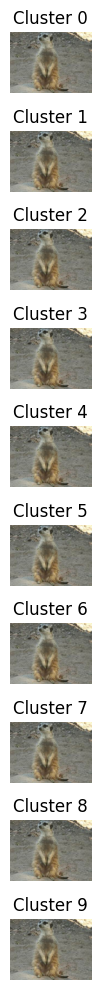

In [15]:
#Em seguida, você pode escolher aleatoriamente um índice de cada cluster e exibir a imagem correspondente:
import matplotlib.pyplot as plt
import random

num_clusters = 10
num_examples_per_cluster = 1

plt.figure(figsize=(15, 10))
for i in range(num_clusters):
    indices = cluster_indices[i]
    random.shuffle(indices)
    for j in range(min(num_examples_per_cluster, len(indices))):
        index = indices[j]
        img_path = os.path.join(subpasta_path, arquivo)
        img = plt.imread(img_path)
        plt.subplot(num_clusters, num_examples_per_cluster, i * num_examples_per_cluster + j + 1)
        plt.imshow(img)
        plt.axis('off')
        plt.title(f'Cluster {i}')
plt.tight_layout()
plt.show()